# Importing the Libraries and the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(plt.style.available)
# plt.style.use(['seaborn-v0_8-white'])
plt.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
raw_df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
raw_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [4]:
raw_df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Data Cleaning

### Duplicates and Missing Values

In [6]:
raw_df.duplicated().sum()

6

In [7]:
raw_df = raw_df.drop_duplicates()

In [8]:
raw_df.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [9]:
raw_df = raw_df.dropna()
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


### DataType Conversions

In [10]:
# manipulating the Year string column ->
raw_df['Year'] = raw_df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
raw_df['Year'].info()

<class 'pandas.core.series.Series'>
Index: 5659 entries, 1 to 15508
Series name: Year
Non-Null Count  Dtype
--------------  -----
5659 non-null   int32
dtypes: int32(1)
memory usage: 66.3 KB


In [11]:
# Manipulating the Duration column
raw_df['Duration'] = pd.to_numeric(raw_df['Duration'].str.replace(' min', '', regex=True))
raw_df['Duration'].info()

<class 'pandas.core.series.Series'>
Index: 5659 entries, 1 to 15508
Series name: Duration
Non-Null Count  Dtype
--------------  -----
5659 non-null   int64
dtypes: int64(1)
memory usage: 88.4 KB


In [12]:
# Manipulating the Votes column ->
raw_df['Votes'] = pd.to_numeric(raw_df['Votes'].str.replace(',', '', regex=True))
raw_df['Votes'].info()

<class 'pandas.core.series.Series'>
Index: 5659 entries, 1 to 15508
Series name: Votes
Non-Null Count  Dtype
--------------  -----
5659 non-null   int64
dtypes: int64(1)
memory usage: 88.4 KB


In [13]:
raw_df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Baazi,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


### Outliers

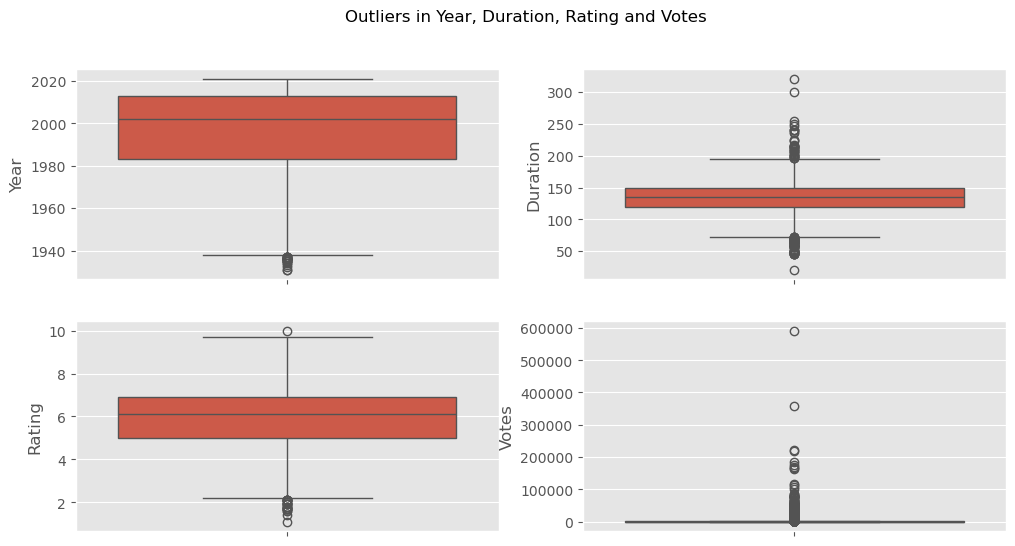

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

plt1 = sns.boxplot(y=raw_df['Year'], ax=axs[0, 0])
plt2 = sns.boxplot(y=raw_df['Duration'], ax=axs[0, 1])
plt3 = sns.boxplot(y=raw_df['Rating'], ax=axs[1, 0])
plt4 = sns.boxplot(y=raw_df['Votes'], ax=axs[1,1])

plt.suptitle("Outliers in Year, Duration, Rating and Votes")
plt.show()

In [15]:
# a function that cleans the Outliers.
def outliers(array):
    '''This method calculates the upper and lower limits and finds outliers in an attribute
    of the dataset passed as an array.
    It further trims/caps the outliers to their respective lower or upper limits.'''

    '''Calculating the upper and the lower limit of the attribute.'''
    iqr = array.quantile(0.75) - array.quantile(0.25)
    lower_limit = array.quantile(0.25) - (1.5 * iqr)
    upper_limit = array.quantile(0.75) + (1.5 * iqr)
    
    '''Trimming the outlier.'''
    '''Creating a new_array with trimmed outliers.'''
    new_array = []
    for i in array:
        if i < lower_limit:
            i = lower_limit
        elif i > upper_limit:
            i = upper_limit
        new_array.append(i)
    '''returning an array with trimmed outliers'''
    return np.array(new_array)

In [16]:
# Capping the Outliers in the 'Year', 'Duration', 'Rating' and 'Voting' variable ->
raw_df['Year'] = outliers(raw_df['Year'])
raw_df['Duration'] = outliers(raw_df['Duration'])
raw_df['Rating'] = outliers(raw_df['Rating'])
raw_df['Votes'] = outliers(raw_df['Votes'])

# Data Visualization

In [17]:
raw_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


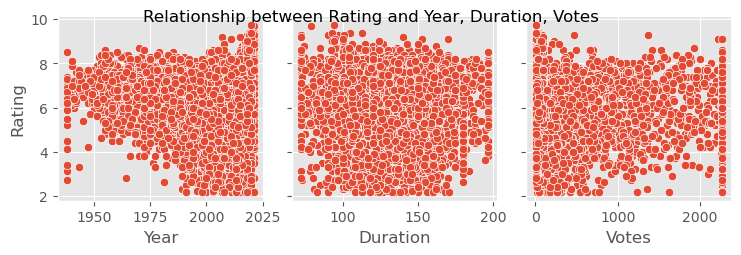

In [18]:
# Relationship between Rating and other Numeric variables ->
sns.pairplot(data=raw_df, x_vars=['Year', 'Duration', 'Votes'], y_vars='Rating')
plt.suptitle("Relationship between Rating and Year, Duration, Votes")
plt.show()

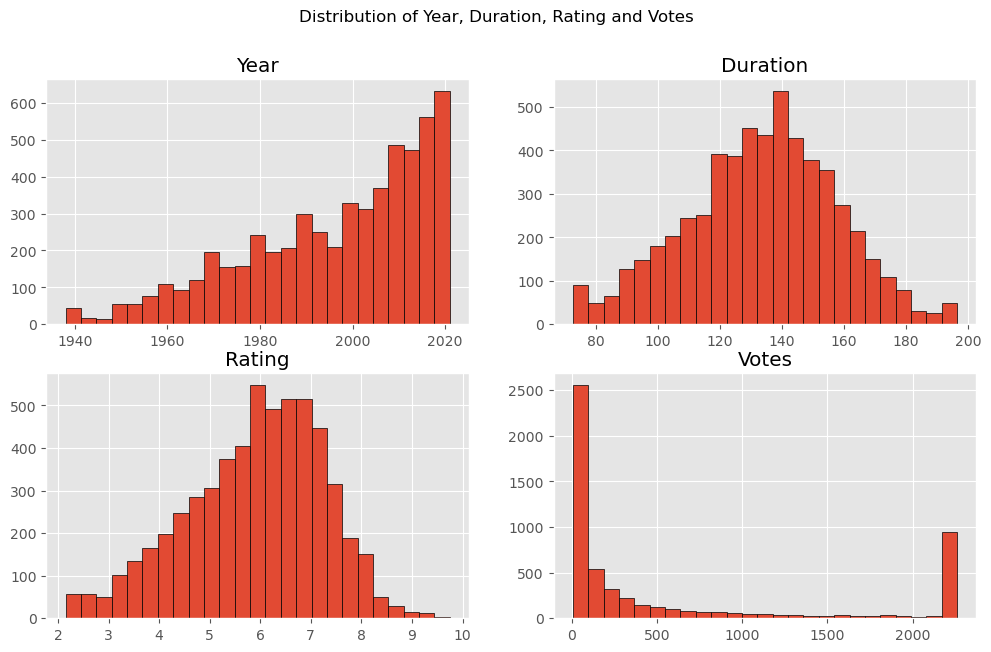

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
plt1 = raw_df['Year'].hist(bins=25, edgecolor='black', ax=axs[0,0])
plt1.set_title("Year")

plt2 = raw_df['Duration'].hist(bins=25, edgecolor='black', ax=axs[0,1])
plt2.set_title("Duration")

plt3 = raw_df['Rating'].hist(bins=25, edgecolor='black', ax=axs[1,0])
plt3.set_title("Rating")

plt4 = raw_df['Votes'].hist(bins=25, edgecolor='black', ax=axs[1,1])
plt4.set_title("Votes")

plt.suptitle("Distribution of Year, Duration, Rating and Votes")
plt.show()

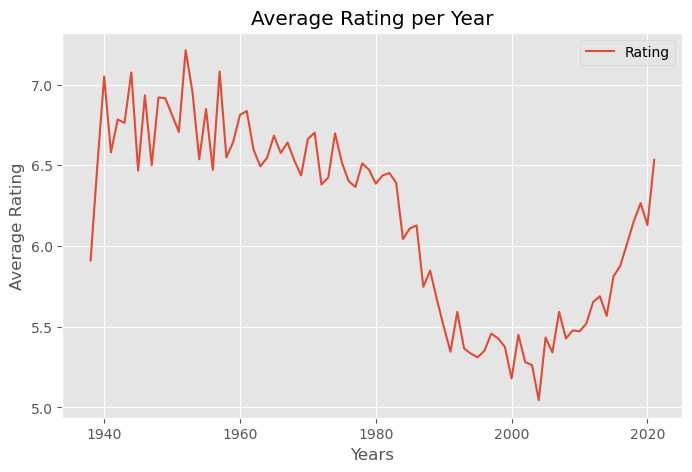

In [20]:
raw_df[['Year', 'Rating']].groupby(by=['Year']).mean().plot(kind='line', figsize=(8, 5))
plt.xlabel("Years")
plt.ylabel("Average Rating")
plt.title("Average Rating per Year")
plt.show()

C:\Users\DeLL\AppData\Local\Temp\ipykernel_13720\1238603819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='Set1')


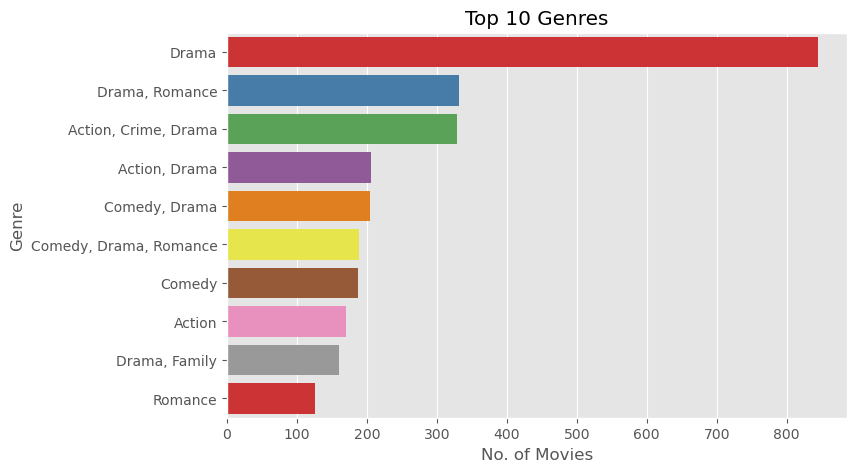

In [21]:
# Analysing diffrent Genres ->
top_10_genres = raw_df['Genre'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='Set1')
plt.title("Top 10 Genres")
plt.xlabel("No. of Movies")
plt.ylabel("Genre")
plt.show()

C:\Users\DeLL\AppData\Local\Temp\ipykernel_13720\2851039005.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_actors.values, y=top10_actors.index, palette='Set1')


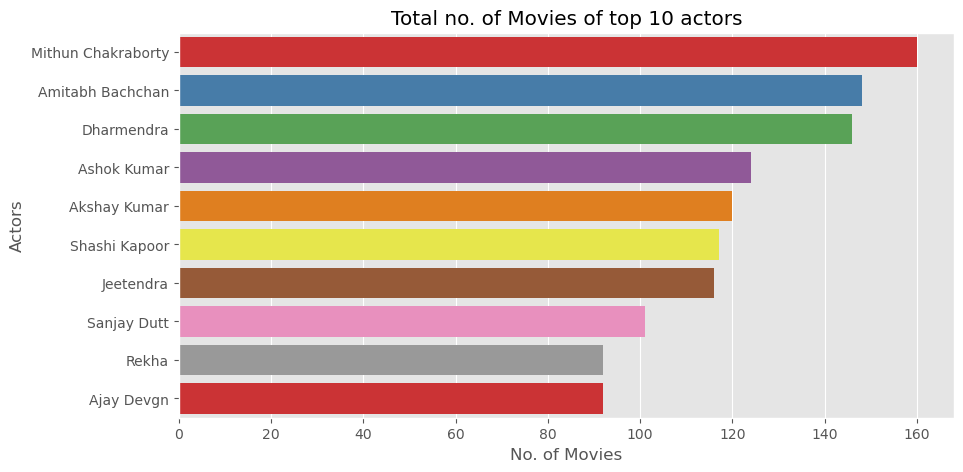

In [22]:
all_actors = pd.concat([raw_df['Actor 1'], raw_df['Actor 2'], raw_df['Actor 3']])

top10_actors = all_actors.value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top10_actors.values, y=top10_actors.index, palette='Set1')
plt.title("Total no. of Movies of top 10 actors")
plt.xlabel("No. of Movies")
plt.ylabel("Actors")
plt.show()

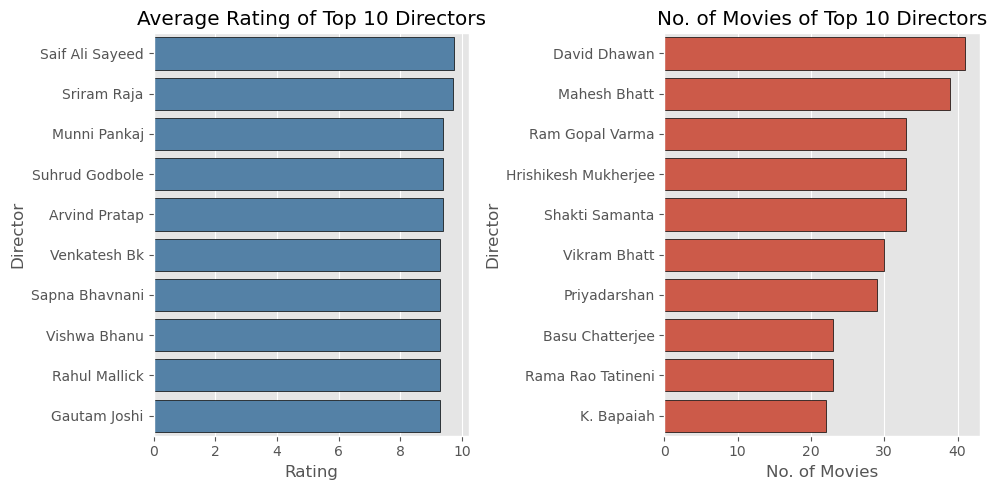

In [23]:
top_10_directors = raw_df['Director'].value_counts().sort_values(ascending=False).head(10)
top_10_directors_rating = raw_df[['Director', 'Rating']].groupby(['Director']).mean().sort_values(['Rating'], ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.barplot(y=top_10_directors_rating.index,  x=top_10_directors_rating['Rating'], color='steelblue', edgecolor='black')
plt.title("Average Rating of Top 10 Directors")

plt.subplot(1,2,2)
sns.barplot(y=top_10_directors.index, x=top_10_directors.values, edgecolor='black')
plt.title("No. of Movies of Top 10 Directors")
plt.xlabel("No. of Movies")

plt.tight_layout()
plt.show()

In [24]:
# Movies with high rating ->
high_rated_movies = raw_df[raw_df['Rating'] > 8.0]
high_rated_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
43,1971,2007.0,136.0,"Action, Drama, War",8.1,1892.00,Amrit Sagar,Manoj Bajpayee,Ravi Kishan,Deepak Dobriyal
75,3 Idiots,2009.0,170.0,"Comedy, Drama",8.4,2261.25,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
137,A Billion Colour Story,2016.0,105.0,Drama,8.1,412.00,Padmakumar Narasimhamurthy,Dhruva Padmakumar,Gaurav Sharma,Vasuki
173,A Wednesday,2008.0,104.0,"Action, Crime, Drama",8.1,2261.25,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
392,Aandhi,1975.0,133.0,"Drama, Romance",8.1,1406.00,Gulzar,Suchitra Sen,Sanjeev Kumar,Om Shivpuri
...,...,...,...,...,...,...,...,...,...,...
15071,Win Marathon,2018.0,94.0,"Drama, Sport",9.0,70.00,Aryan Neeraaj Anand,Shubhanshu Satyadeo,Aryan Neeraaj Anand,Ankita Bahuguna
15116,Writing with Fire,2021.0,92.0,Documentary,8.1,106.00,Sushmit Ghosh,Rintu Thomas,Meera Devi,Shyamkali Devi
15288,Yeh Suhaagraat Impossible,2019.0,92.0,Comedy,8.6,500.00,Abhinav Thakur,Preetika Chauhan,Aarav Mavi,Aloknath Pathak
15470,Zindagi Ek Safar,1988.0,120.0,"Documentary, Biography, Musical",8.2,33.00,Sandip Ray,Kishore Kumar,Amitabh Bachchan,Asha Bhosle


In [25]:
# Best movies every year according to the Ratings ->
high_rated_movies[['Name', 'Rating', 'Year']].groupby(['Year']).max().sort_values(['Rating'], ascending=False)

,Name,Rating
Year,,
2020.0,The Reluctant Crime,9.75
2021.0,Writing with Fire,9.70
2019.0,Yeh Suhaagraat Impossible,9.40
2018.0,Win Marathon,9.30
2015.0,Under the Same Sun,9.20
2007.0,Like Stars on Earth,9.20
2011.0,Zindagi Na Milegi Dobara,9.10
2017.0,Turup (Checkmate),9.00
2008.0,Pancham Unmixed: Mujhe Chalte Jaana Hai ...,8.90


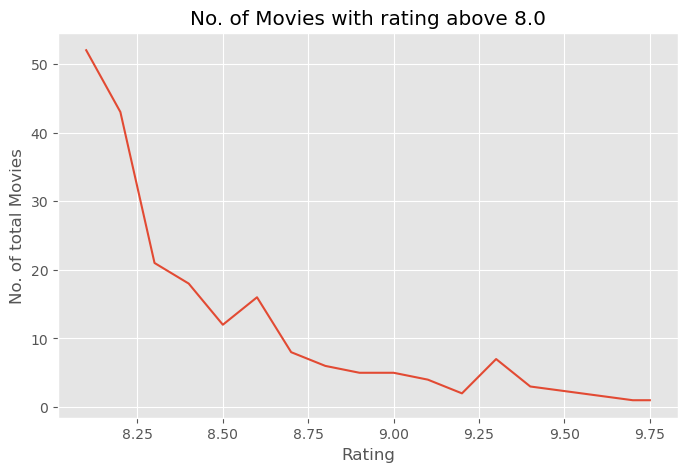

In [26]:
# Analysing the Number of Movies for each rating above than 8.0 ->
high_rated_movies[['Name', 'Rating']].groupby(by=['Rating']).count().sort_values(by=['Rating'], ascending=False).plot(kind='line', figsize=(8, 5), legend=None)

plt.title("No. of Movies with rating above 8.0")
plt.xlabel("Rating")
plt.ylabel("No. of total Movies")
plt.show()

In [27]:
raw_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [28]:
# Create new features to use instead of Genre, Actors and Director Variables ->
genre_avg_rating = raw_df[['Genre', 'Rating']].groupby(by=['Genre']).transform("mean")
raw_df['Genre_avg_rating'] = genre_avg_rating

director_avg_rating = raw_df[['Director', 'Rating']].groupby(by=['Director']).transform("mean")
raw_df['Director_avg_rating'] = director_avg_rating

actor1_avg_rating = raw_df[['Actor 1', 'Rating']].groupby(by=['Actor 1']).transform("mean")
raw_df['Actor1_avg_rating'] = actor1_avg_rating

actor2_avg_rating = raw_df[['Actor 2', 'Rating']].groupby(by=['Actor 2']).transform("mean")
raw_df['Actor2_avg_rating'] = actor2_avg_rating

actor3_avg_rating = raw_df[['Actor 3', 'Rating']].groupby(by=['Actor 3']).transform("mean")
raw_df['Actor3_avg_rating'] = actor3_avg_rating

raw_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.416765,7.000000,6.850000,7.000000,7.000000
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000


In [29]:
df = raw_df.copy()  # Checkpoint

<Axes: >

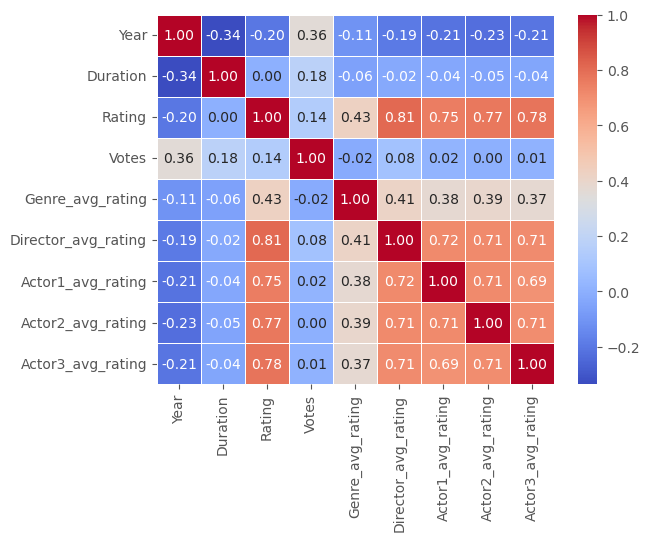

In [30]:
new_df = df.drop(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
corr_matrix = new_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.5, cmap='coolwarm')

# Data Preprocessing

## Inputs and Targets

In [31]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.416765,7.000000,6.850000,7.000000,7.000000
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000


In [32]:
X = df.drop(['Name', 'Rating' ,'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
X.head()

,Year,Duration,Votes,Genre_avg_rating,Director_avg_rating,Actor1_avg_rating,Actor2_avg_rating,Actor3_avg_rating
1,2019.0,109.0,8.0,6.416765,7.000000,6.850000,7.000000,7.000000
3,2019.0,110.0,35.0,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997.0,147.0,827.0,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005.0,142.0,1086.0,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012.0,82.0,326.0,5.477778,5.600000,5.600000,5.883333,5.600000


In [33]:
y = df['Rating']
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

## Train test splitting

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Model Training

In [36]:
# Accuracy Method.
from sklearn.metrics import r2_score, mean_squared_error
def accuracy(X, y, model):
    '''This Method calculates r_squared and mean_squared_error values based on 
    given inputs and target.'''
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y_pred, y))
    r_squared = r2_score(y_pred, y)
    
    print("The R_squared value: ", r_squared)
    print("The Root Mean squared error: ", rmse)

In [37]:
# K-Fold Cross Validation.
from sklearn.model_selection import cross_val_score
def k_fold_cross_val(X, y, model):
    '''This Method is used to calculate the mean accuracy and the std.dev. using 
    k Fold cross validation.'''
    accuracies = cross_val_score(estimator=model, X=X, y=y, cv=10)
    print("Mean R² Score: ", (accuracies.mean()*100).round(2), "%")
    print("Standard Deviation: ", (accuracies.std()*100).round(2), "%")

## Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
accuracy(X_train, y_train, lr)

The R_squared value:  0.741703985989165
The Root Mean squared error:  0.6248671070474155


In [40]:
k_fold_cross_val(X_train, y_train, lr)

Mean R² Score:  79.28 %
Standard Deviation:  1.98 %


## Polynomial Regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)

pr = LinearRegression()
pr.fit(X_train_poly, y_train)

LinearRegression()

In [42]:
accuracy(X_train_poly, y_train, pr)

The R_squared value:  0.8151447783995777
The Root Mean squared error:  0.5447577785819155


In [43]:
k_fold_cross_val(X_train_poly, y_train, pr)

Mean R² Score:  82.89 %
Standard Deviation:  1.95 %


## Support Vector Regression

In [44]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [45]:
accuracy(X_train, y_train, svr)

The R_squared value:  0.8189914483209966
The Root Mean squared error:  0.5309056749274447


In [46]:
k_fold_cross_val(X_train, y_train, svr)

Mean R² Score:  82.86 %
Standard Deviation:  1.89 %


## Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [48]:
accuracy(X_train, y_train, dtr)

The R_squared value:  1.0
The Root Mean squared error:  3.3590375281204464e-16


In [49]:
k_fold_cross_val(X_train, y_train, dtr)

Mean R² Score:  61.0 %
Standard Deviation:  5.43 %


## Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [51]:
accuracy(X_train, y_train, rfr)

The R_squared value:  0.9613295629747003
The Root Mean squared error:  0.25648022800181847


In [52]:
k_fold_cross_val(X_train, y_train, rfr)

Mean R² Score:  79.78 %
Standard Deviation:  2.16 %


# Model Testing

In [53]:
X_test = scaler.fit_transform(X_test)
X_test_poly = poly_features.fit_transform(X_test)

print("Testing Accuracy for Linear Regression: ")
accuracy(X_test, y_test, lr)
print("\nTesing Accuracy for Polynomial regression: ")
accuracy(X_test_poly, y_test, pr)
print("\nTesting Accuracy for Support Vector Regression: ")
accuracy(X_test, y_test, svr)
print("\nTesting Accuracy for Random Forest Regression: ")
accuracy(X_test, y_test, rfr)

Testing Accuracy for Linear Regression: 
The R_squared value:  0.733932156498678
The Root Mean squared error:  0.6294200777791261

Tesing Accuracy for Polynomial regression: 
The R_squared value:  0.7978752308308584
The Root Mean squared error:  0.5732821142649283

Testing Accuracy for Support Vector Regression: 
The R_squared value:  0.7739573363524083
The Root Mean squared error:  0.5813466681639583

Testing Accuracy for Random Forest Regression: 
The R_squared value:  0.7415896962371065
The Root Mean squared error:  0.6320323799684807


# Conclusion

**The Polynomial and Support vector Regressions are explaining the variance in the Target better than linear or Random forest regression, with Polynomial Regression having the Best R² Score of `79.8%` and an RMS value of `0.5813` which is the average diffrence between actual and predicted targets. So, we can select Polynomial Regression as the best model with highest performance.**

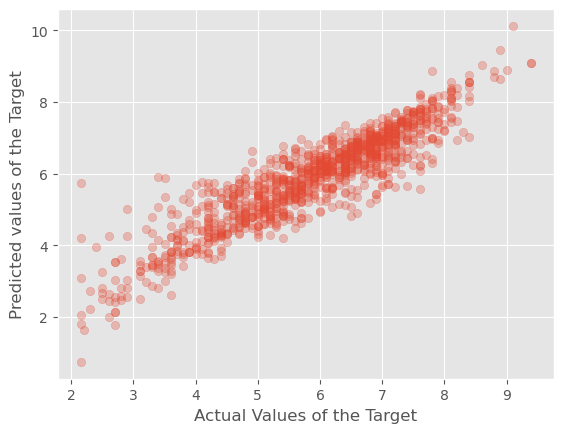

In [54]:
plt.scatter(x=y_test, y=pr.predict(X_test_poly), alpha=0.3)
plt.xlabel("Actual Values of the Target")
plt.ylabel("Predicted values of the Target")
plt.show()

# <h1 align='center'>Thank You!</h1>